<a href="https://colab.research.google.com/github/ViviennePetracca/MST-Data-Analysis/blob/main/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#From Spreadsheet ->  #2

#Have prepared: A spreadsheet with each dataset you want to stitch together
#A completely blank sheet labeled 'Master'
#If you need help converting from a CSV file to google sheets:
#Open a spreadsheet and click File -> Import. Then choose a CSV to upload.
# Column names must be in row 1 only

#Future: Upload CSV files directly into Colab and then make it into a spreadsheet

In [86]:
# Import via Google Spreadsheets


from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
import numpy as np


wb = gc.open('Master Bird Spreadsheet')


In [87]:
# Stores the sheets as ListOfFrames and combines them (Sheet1 will be labeled as ListOfFrames[0])

ListOfFrames = []

for ws in wb.worksheets():
  if ws.title != 'Master':
    rows = ws.get_all_values()
    df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
    ListOfFrames.append(df)

    df = pd.concat(ListOfFrames)

In [88]:
#Combining Columns if they don't have the exact same name:

df['Combined Number of Individuals'] = df['No of individuals'].fillna(df['Number of Individuals'])
Masterdf = df.drop(['No of individuals','Number of Individuals'],axis=1)


In [89]:
#Delete rows that include x (Null values/Above or below a certain value/ a certain name)

#Null Values
#df = Masterdf.dropna()


#Column name, value 'if not number'
df = Masterdf[df.Species != 'Lesser Whitethroat']

df

,Date (mm-dd-yyyy),Transect,Survey Site (m),Species,Date\n(mm-dd-yyyy),Combined Number of Individuals
1,7/3/2021,1,250,Blackcap,NaN,1
2,7/3/2021,1,250,Barn Swallow,NaN,1
3,7/3/2021,1,250,Blackbird,NaN,1
4,7/3/2021,1,250,Golden Oriole,NaN,1
5,7/3/2021,1,250,Dunnock,NaN,1
...,...,...,...,...,...,...
222,NaN,3,100,Blackcap,7/30/2022,1
223,NaN,3,100,Blue Tit,7/30/2022,1
224,NaN,2,250,Blackcap,7/30/2022,1
225,NaN,2,250,Blackcap,7/30/2022,1


In [90]:
#Sort by Column

Masterdf.sort_values(by=['Date\n(mm-dd-yyyy)'])


,Date (mm-dd-yyyy),Transect,Survey Site (m),Species,Date\n(mm-dd-yyyy),Combined Number of Individuals
180,NaN,5,650,Common Buzzard,17/07/2022,1
186,NaN,5,0,Blackcap,17/07/2022,1
185,NaN,5,0,Blackcap,17/07/2022,1
184,NaN,5,350,Blackcap,17/07/2022,2
183,NaN,5,350,Blackcap,17/07/2022,1
...,...,...,...,...,...,...
519,6/27/2022,5,650,Blackcap,NaN,1
520,6/27/2022,5,650,Golden Oriole,NaN,1
521,6/27/2022,5,650,Blackcap,NaN,1
522,6/27/2022,5,650,Golden Oriole,NaN,1


In [110]:
#Imports cleaned dataset to new Google Sheets

Masterlist = [Masterdf.columns.tolist()] + Masterdf.to_numpy().tolist()
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

sh = gc.create('Master Bird Data')

# Open our new sheet and add some data.
worksheet = gc.open('Master Bird Data').sheet1

MasterExport = Masterdf
worksheet.update_cells(MasterExport)
# Go to https://sheets.google.com to see your new spreadsheet.

ValueError: ignored

In [ ]:
# By this point the dataset is cleaned: The next step is data analysis

In [51]:
#Makes values in columns into floats (which is what the code uses for running data analysis tests)

Masterdf['Transect1'] = pd.to_numeric(Masterdf['Transect'],errors = 'coerce')
Masterdf['Combined Number of Individuals1'] = pd.to_numeric(Masterdf['Combined Number of Individuals'],errors = 'coerce')

In [15]:
print(df.dtypes)

Date (mm-dd-yyyy)                   object
Transect                            object
Survey Site (m)                     object
Species                             object
Date\n(mm-dd-yyyy)                  object
Combined Number of Individuals      object
Transect1                          float64
Combined Number of Individuals1    float64
dtype: object


In [52]:
#Pearson's correlation coefficient

Correlation= df['Transect1'].corr(df['Combined Number of Individuals1'])

print(Correlation)



0.053875485287142526


In [53]:
#Chi- Square Test
import pandas as pd
from scipy import stats

crosstab = pd.crosstab(df['Transect1'], df['Combined Number of Individuals1'])
crosstab

stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=95.12402902517032, pvalue=6.043425455671467e-05, dof=48, expected_freq=array([[2.33138441e+02, 5.07540323e+01, 9.07795699e+00, 4.53897849e+00,
        2.88844086e+00, 1.23790323e+00, 4.12634409e-01, 2.06317204e+00,
        8.25268817e-01, 4.12634409e-01, 8.25268817e-01, 4.12634409e-01,
        4.12634409e-01],
       [4.02486559e+01, 8.76209677e+00, 1.56720430e+00, 7.83602151e-01,
        4.98655914e-01, 2.13709677e-01, 7.12365591e-02, 3.56182796e-01,
        1.42473118e-01, 7.12365591e-02, 1.42473118e-01, 7.12365591e-02,
        7.12365591e-02],
       [1.54159946e+02, 3.35604839e+01, 6.00268817e+00, 3.00134409e+00,
        1.90994624e+00, 8.18548387e-01, 2.72849462e-01, 1.36424731e+00,
        5.45698925e-01, 2.72849462e-01, 5.45698925e-01, 2.72849462e-01,
        2.72849462e-01],
       [2.20228495e+01, 4.79435484e+00, 8.57526882e-01, 4.28763441e-01,
        2.72849462e-01, 1.16935484e-01, 3.89784946e-02, 1.94892473e-01,
        7.79569892e-02, 3.8978

<Axes: xlabel='Transect1'>

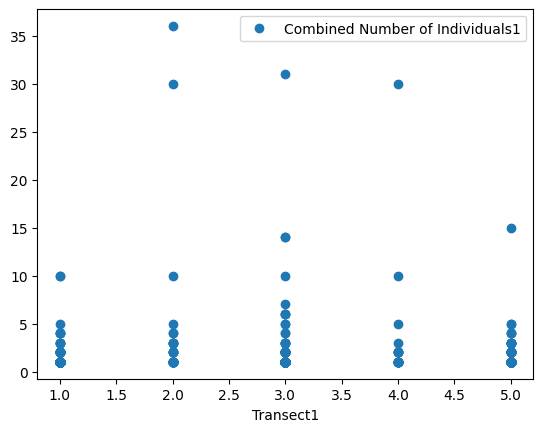

In [54]:
#Graphing

import matplotlib.pyplot as plt

df.plot(x='Transect1', y='Combined Number of Individuals1', style='o')


In [ ]:
#FUTURE: Merge Rows with same column name to fill null values

#Masterdf.groupby(['Date\n(mm-dd-yyyy)']).first().reset_index()
